<a href="https://colab.research.google.com/github/dipayandas97/Indoor-Navigation-System/blob/master/Indoor_Navigation_System_(NLOS)_Trajectory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


##Topology / Graph
- node_to_coordinates[]
- coordinates_to_node()
- nodes_connected_to[]
- adj_matrix[]

In [0]:
#dictionaries

node_to_coordinates = {
    'C01':[5,0],
    'C02':[5,1],
    'C03':[5,2],
    'C04':[5,3],
    'C05':[5,4],
    'C06':[5,5],
    'C07':[5,6],
    'C08':[5,7],
    'C09':[5,8],
    'C10':[5,9],
    'C11':[5,10],
    'C12':[5,11],
    'C13':[5,12],
    'C14':[5,13],
    'C15':[5,14],
    'C16':[5,15],
    'C17':[5,16],
    'C18':[5,17],
    'C19':[5,18],
    'C20':[5,19],
    'C21':[5,20],
    'C22':[5,21],
    'C23':[5,22],

    'R11':[1,1],
    'R12':[2,1],
    'R13':[3,1],
    'R14':[1,2],
    'R15':[2,2],
    'R16':[3,2],
    'R17':[4,2],

    'R21':[1,7],
    'R22':[2,7],
    'R23':[3,7],
    'R24':[1,8],
    'R25':[2,8],
    'R26':[3,8],
    'R27':[4,7],

    'R31':[1,15],
    'R32':[2,15],
    'R33':[3,15],
    'R34':[1,16],
    'R35':[2,16],
    'R36':[3,16],
    'R37':[4,15],

    'R41':[1,20],
    'R42':[2,20],
    'R43':[3,20],
    'R44':[1,21],
    'R45':[2,21],
    'R46':[3,21],
    'R47':[4,20]                               
}

def coordinates_to_node(c):
    x, y = c[0], c[1]       #c can be nd.array or list
    for node, pos in node_to_coordinates.items():
        if x == pos[0] and y == pos[1]:
            return node
    raise Exception('Invalid coordinates!')

nodes_connected_to = {
    'C01': ['C01', 'C02'],
    'C02': ['C02', 'C01', 'C03'],
    'C03': ['C03', 'C02', 'C04', 'R17'],
    'C04': ['C04', 'C03', 'C05'],
    'C05': ['C05', 'C04', 'C06'],
    'C06': ['C06', 'C05', 'C07'],
    'C07': ['C07', 'C06', 'C08'],
    'C08': ['C08', 'C07', 'C09', 'R27'],
    'C09': ['C09', 'C08', 'C10'],
    'C10': ['C10', 'C09', 'C11'],
    'C11': ['C11', 'C10', 'C12'],
    'C12': ['C12', 'C11', 'C13'],
    'C13': ['C13', 'C12', 'C14'],
    'C14': ['C14', 'C13', 'C15'],
    'C15': ['C15', 'C14', 'C16'],
    'C16': ['C16', 'C15', 'C17', 'R37'],
    'C17': ['C17', 'C16', 'C18'],
    'C18': ['C18', 'C17', 'C19'],
    'C19': ['C19', 'C18', 'C20'],
    'C20': ['C20', 'C19', 'C21'],
    'C21': ['C21', 'C20', 'C22', 'R47'],
    'C22': ['C22', 'C21', 'C23'],
    'C23': ['C23', 'C22'],

    'R11': ['R11', 'R12', 'R15', 'R14'],
    'R12': ['R12', 'R11', 'R15', 'R13', 'R14', 'R16'],
    'R13': ['R13', 'R12', 'R16', 'R15', 'R17'],
    'R14': ['R14', 'R11', 'R12', 'R15'],
    'R15': ['R12', 'R11', 'R15', 'R13', 'R14', 'R16'],
    'R16': ['R16', 'R15', 'R12', 'R13', 'R17'],
    'R17': ['R17', 'R16', 'R13', 'C03'],

    'R21': ['R21', 'R22', 'R25', 'R24'],
    'R22': ['R22', 'R21', 'R25', 'R23', 'R24', 'R26'],
    'R23': ['R23', 'R22', 'R26', 'R25', 'R27'],
    'R24': ['R24', 'R21', 'R22', 'R25'],
    'R25': ['R22', 'R21', 'R25', 'R23', 'R24', 'R26'],
    'R26': ['R26', 'R25', 'R22', 'R23', 'R27'],
    'R27': ['R27', 'R26', 'R23', 'C08'],

    'R31': ['R31', 'R32', 'R35', 'R34'],
    'R32': ['R32', 'R31', 'R35', 'R33', 'R34', 'R36'],
    'R33': ['R33', 'R32', 'R36', 'R35', 'R37'],
    'R34': ['R34', 'R31', 'R32', 'R35'],
    'R35': ['R32', 'R31', 'R35', 'R33', 'R34', 'R36'],
    'R36': ['R36', 'R35', 'R32', 'R33', 'R37'],
    'R37': ['R37', 'R36', 'R33', 'C16'],

    'R41': ['R41', 'R42', 'R45', 'R44'],
    'R42': ['R42', 'R41', 'R45', 'R43', 'R44', 'R46'],
    'R43': ['R43', 'R42', 'R46', 'R45', 'R47'],
    'R44': ['R44', 'R41', 'R42', 'R45'],
    'R45': ['R42', 'R41', 'R45', 'R43', 'R44', 'R46'],
    'R46': ['R46', 'R45', 'R42', 'R43', 'R47'],
    'R47': ['R47', 'R46', 'R43', 'C21'],
}

nodes = list(node_to_coordinates.keys())

['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R21', 'R22', 'R23', 'R24', 'R25', 'R26', 'R27', 'R31', 'R32', 'R33', 'R34', 'R35', 'R36', 'R37', 'R41', 'R42', 'R43', 'R44', 'R45', 'R46', 'R47']


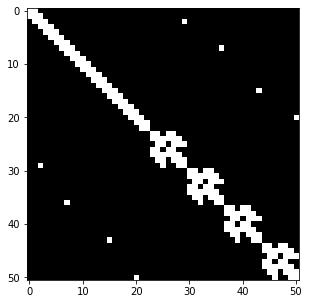

In [0]:
#create adjacency matrix
num_of_nodes = len(nodes)
adj_matrix = np.zeros((num_of_nodes, num_of_nodes))

for x, node_x in enumerate(nodes):
    for y, node_y in enumerate(nodes):
        connected_nodes = nodes_connected_to[node_x]
        if node_y in connected_nodes:
            adj_matrix[x][y] = 1

print(nodes)
plt.figure(figsize=(5,5))
plt.imshow(adj_matrix, cmap='gray') 
plt.show()

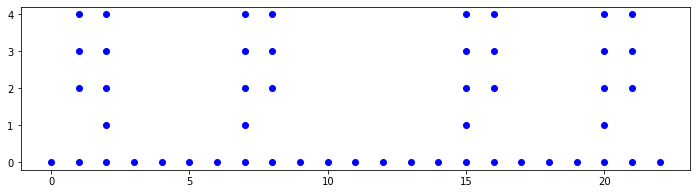

In [0]:
plt.figure(figsize=(12,3))
for node in list(node_to_coordinates.keys()):
    plt.scatter(node_to_coordinates[node][1], 5-node_to_coordinates[node][0], c='b')
plt.show()

#Data Extraction and Heat_maps

In [0]:
filepath = '/content/drive/My Drive/Final_year_project/NLOS_data/'


os.chdir(filepath+'AP_1/')
AP_1_file_names = os.listdir()

os.chdir(filepath+'AP_2/')
AP_2_file_names = os.listdir()

os.chdir(filepath+'AP_3/')
AP_3_file_names = os.listdir()

os.chdir(filepath+'AP_4/')
AP_4_file_names = os.listdir()

In [0]:
def get_normal_noise(loc, scale, size):
    randomNums = np.random.normal(loc=loc, scale=scale, size=size)
    return np.round(randomNums).astype(np.int)

In [0]:
def create_data(noise_std):
    nodes = list(node_to_coordinates.keys())
    data_dict = {}
    n_data_dict = {}

    for i,node in enumerate(nodes):
        f1 = pd.read_csv(filepath+'AP_1/'+node+'.txt', header=None).to_numpy()
        n_f1 = f1 + get_normal_noise(loc=0, scale=noise_std, size=f1.shape)
        
        f2 = pd.read_csv(filepath+'AP_2/'+node+'.txt', header=None).to_numpy()
        n_f2 = f2 + get_normal_noise(loc=0, scale=noise_std, size=f2.shape)
        
        f3 = pd.read_csv(filepath+'AP_3/'+node+'.txt', header=None).to_numpy()
        n_f3 = f3 + get_normal_noise(loc=0, scale=noise_std, size=f3.shape)    
        
        f4 = pd.read_csv(filepath+'AP_4/'+node+'.txt', header=None).to_numpy()
        n_f4 = f4 + get_normal_noise(loc=0, scale=noise_std, size=f4.shape)    

        data_file = np.hstack((f1,f2,f3,f4))
        data_dict[node] = data_file

        n_data_file = np.hstack((n_f1,n_f2,n_f3, n_f4))
        n_data_dict[node] = n_data_file
    return data_dict, n_data_dict

Access Point:  1


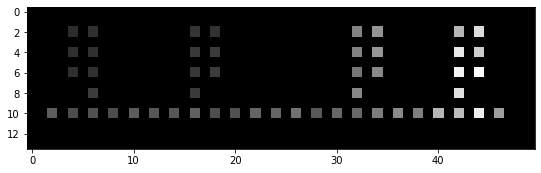

Access Point:  2


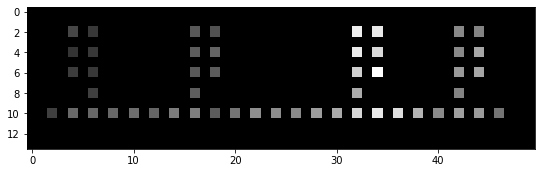

Access Point:  3


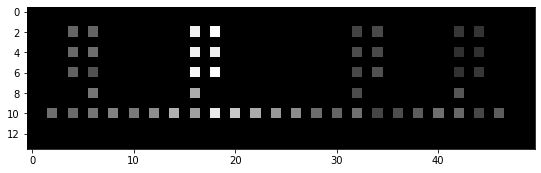

Access Point:  4


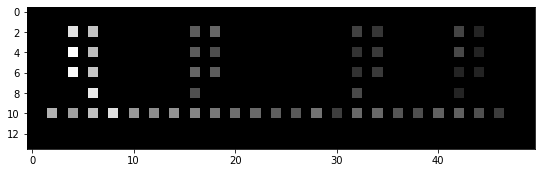

In [0]:
#Heatmaps for each AP
scale = 2
for ap in range(4):
    heat_map = np.zeros((7*scale,25*scale))
    for n in nodes:
        pos = node_to_coordinates[n]
        avg_power = np.mean(data_dict[n][:,ap])
        heat_map[pos[0]*scale,(pos[1]+1)*scale] = 110+avg_power #offset
    print('Access Point: ',ap+1)
    plt.figure(figsize=(7*scale*0.65,3*scale*0.65))
    plt.imshow(heat_map,cmap='gray')
    plt.show()

#BaseLine SISO location prediction

##General function

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import *
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from sklearn.neighbors import KNeighborsRegressor as KNNR

def SISO(data_dict):
    X = np.concatenate([data_dict[node] for node in nodes])
    y = [node_to_coordinates[node] for node in nodes]

    labels = []
    for label in y:
        for i in range(100):
            labels.append(label) 
    labels = np.asarray(labels)

    X_train, X_test, y_train, y_test = train_test_split(X, labels, shuffle = True, test_size=0.3)

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    inp = Input(shape=(4,))
    x = Dense(128, activation='relu')(inp)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(8, activation='relu')(x)
    x = Dense(2, activation = 'relu')(x)

    model = Model(inp, x)
    model.compile(loss='mse', optimizer='adam')
    lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=0)
    history = model.fit(X_train, y_train, epochs = 200, batch_size=16, verbose=0, validation_data=(X_test, y_test), callbacks=[lr])
    y_pred = model.predict(X_test)

    error_nn = []
    for e in range(y_pred.shape[0]):
        error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

    #KNN
    knn = KNNR(n_neighbors = 2)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    error_knnr = []
    for e in range(y_pred.shape[0]):
        error_knnr.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

    return np.mean(error_nn), np.std(error_nn), np.mean(error_knnr), np.std(error_knnr)

##Noise : 0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.concatenate([data_dict[node] for node in nodes])
y = [node_to_coordinates[node] for node in nodes]

labels = []
for label in y:
    for i in range(100):
        labels.append(label) 
labels = np.asarray(labels)

X_train, X_test, y_train, y_test = train_test_split(X, labels, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

(3570, 4) (3570, 2)
(1530, 4) (1530, 2)


###DNN

In [0]:
from keras.layers import *
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(4,))
x = Dense(128, activation='relu')(inp)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

In [0]:
history = model.fit(X_train, y_train, epochs = 200, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr])

Train on 3570 samples, validate on 1530 samples
Epoch 1/200
3570/3570 [==============================] - 1s 332us/step - loss: 21.4505 - val_loss: 2.6974
Epoch 2/200
3570/3570 [==============================] - 1s 292us/step - loss: 1.3904 - val_loss: 0.8239
Epoch 3/200
3570/3570 [==============================] - 1s 297us/step - loss: 0.6926 - val_loss: 0.6273
Epoch 4/200
3570/3570 [==============================] - 1s 299us/step - loss: 0.5798 - val_loss: 0.5361
Epoch 5/200
3570/3570 [==============================] - 1s 289us/step - loss: 0.4952 - val_loss: 0.4648
Epoch 6/200
3570/3570 [==============================] - 1s 287us/step - loss: 0.4167 - val_loss: 0.4016
Epoch 7/200
3570/3570 [==============================] - 1s 299us/step - loss: 0.3408 - val_loss: 0.3468
Epoch 8/200
3570/3570 [==============================] - 1s 293us/step - loss: 0.2863 - val_loss: 0.2682
Epoch 9/200
3570/3570 [==============================] - 1s 294us/step - loss: 0.2353 - val_loss: 0.2662
Epoch 

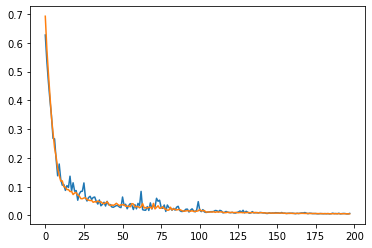

In [0]:
plt.plot(history.history['val_loss'][2:])
plt.plot(history.history['loss'][2:])
plt.show()

Mean error: 0.09087233120096234
Std of error: 0.07686327577814842


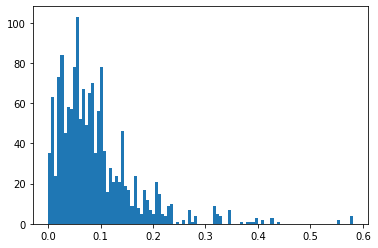

In [0]:
y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

###Classification using one hot encoded nodes


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.concatenate([data_dict[node] for node in nodes])
y = np.asarray([np.eye(len(nodes))[nodes.index(node)] for node in nodes])

labels = []
for label in y:
    for i in range(100):
        labels.append(label) 
labels = np.asarray(labels)

X_train, X_test, y_train, y_test = train_test_split(X, labels, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


(3570, 4) (3570, 51)
(1530, 4) (1530, 51)


In [0]:
from keras.layers import *
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(4,))
x = Dense(128, activation='relu')(inp)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(51, activation = 'softmax')(x)

model = Model(inp, x)
model.compile(loss='categorical_crossentropy', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

Using TensorFlow backend.


In [0]:
model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Train on 3570 samples, validate on 1530 samples
Epoch 1/50
3570/3570 [==============================] - 1s 365us/step - loss: 3.0156 - val_loss: 2.0396
Epoch 2/50
3570/3570 [==============================] - 1s 323us/step - loss: 1.5249 - val_loss: 1.1423
Epoch 3/50
3570/3570 [==============================] - 1s 325us/step - loss: 1.0193 - val_loss: 0.9071
Epoch 4/50
3570/3570 [==============================] - 1s 319us/step - loss: 0.8282 - val_loss: 0.7969
Epoch 5/50
3570/3570 [==============================] - 1s 320us/step - loss: 0.6937 - val_loss: 0.7219
Epoch 6/50
3570/3570 [==============================] - 1s 319us/step - loss: 0.6627 - val_loss: 0.5973
Epoch 7/50
3570/3570 [==============================] - 1s 320us/step - loss: 0.6004 - val_loss: 0.6469
Epoch 8/50
3570/3570 [==============================] - 1s 324us/step - loss: 0.5868 - val_loss: 0.5429
Epoch 9/50
3570/3570 [==============================] - 1s 315us/step - loss: 0.5507 - val_loss: 0.5715
Epoch 10/50
3570

Mean error: 0.006076994534169057
Std of SE error: 0.06285789521772076


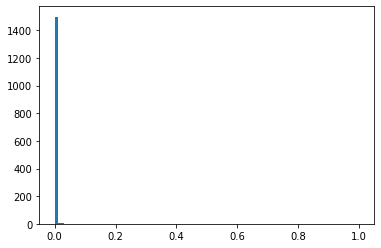

In [0]:
#With added gaussian noise and categorical output

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of SE error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

###KNN

Mean error: 0.0022875816993464053
Std of SE error: 0.03374252242559851


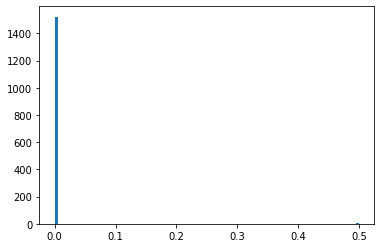

In [0]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

knn = KNNR(n_neighbors = 2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

error_knnr = []
for e in range(y_pred.shape[0]):
    error_knnr.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_knnr))
print('Std of SE error:',np.std(error_knnr))

plt.hist(np.asarray(error_knnr), bins=100)
plt.show()

##Noise : 2


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.concatenate([n_data_dict[node] for node in nodes])
y = [node_to_coordinates[node] for node in nodes]

labels = []
for label in y:
    for i in range(100):
        labels.append(label) 
labels = np.asarray(labels)

X_train, X_test, y_train, y_test = train_test_split(X, labels, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

(3570, 4) (3570, 2)
(1530, 4) (1530, 2)


###DNN

In [0]:
from keras.layers import *
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(4,))
x = Dense(128, activation='relu')(inp)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

In [0]:
history = model.fit(X_train, y_train, epochs = 200, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr])

Train on 3570 samples, validate on 1530 samples
Epoch 1/200
3570/3570 [==============================] - 1s 337us/step - loss: 21.4359 - val_loss: 3.5815
Epoch 2/200
3570/3570 [==============================] - 1s 286us/step - loss: 2.0563 - val_loss: 1.2886
Epoch 3/200
3570/3570 [==============================] - 1s 314us/step - loss: 1.0113 - val_loss: 1.0537
Epoch 4/200
3570/3570 [==============================] - 1s 312us/step - loss: 0.8307 - val_loss: 1.0462
Epoch 5/200
3570/3570 [==============================] - 1s 317us/step - loss: 0.7611 - val_loss: 0.7080
Epoch 6/200
3570/3570 [==============================] - 1s 302us/step - loss: 0.6853 - val_loss: 0.6950
Epoch 7/200
3570/3570 [==============================] - 1s 310us/step - loss: 0.6406 - val_loss: 0.5735
Epoch 8/200
3570/3570 [==============================] - 1s 318us/step - loss: 0.5942 - val_loss: 0.7823
Epoch 9/200
3570/3570 [==============================] - 1s 320us/step - loss: 0.5770 - val_loss: 0.5501
Epoch 

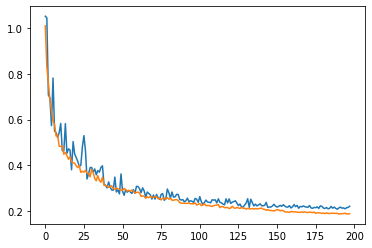

In [0]:
plt.plot(history.history['val_loss'][2:])
plt.plot(history.history['loss'][2:])
plt.show()

Mean error: 0.4956579992915882
Std of error: 0.43907955248922814


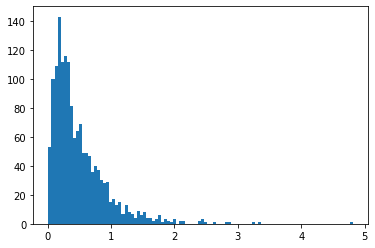

In [0]:
y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

###KNN

Mean error: 0.2680127002389723
Std of SE error: 0.5575382776749112


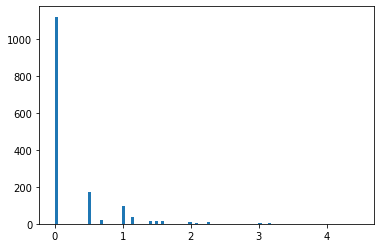

In [0]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

knn = KNNR(n_neighbors = 2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

error_knnr = []
for e in range(y_pred.shape[0]):
    error_knnr.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_knnr))
print('Std of SE error:',np.std(error_knnr))

plt.hist(np.asarray(error_knnr), bins=100)
plt.show()

##Noise : 4


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.concatenate([n_data_dict[node] for node in nodes])
y = [node_to_coordinates[node] for node in nodes]

labels = []
for label in y:
    for i in range(100):
        labels.append(label) 
labels = np.asarray(labels)

X_train, X_test, y_train, y_test = train_test_split(X, labels, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

(3570, 4) (3570, 2)
(1530, 4) (1530, 2)


###DNN

In [0]:
from keras.layers import *
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(4,))
x = Dense(128, activation='relu')(inp)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

In [0]:
history = model.fit(X_train, y_train, epochs = 200, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr])

Train on 3570 samples, validate on 1530 samples
Epoch 1/200
3570/3570 [==============================] - 1s 329us/step - loss: 21.3552 - val_loss: 3.4846
Epoch 2/200
3570/3570 [==============================] - 1s 293us/step - loss: 2.1123 - val_loss: 1.6386
Epoch 3/200
3570/3570 [==============================] - 1s 291us/step - loss: 1.3559 - val_loss: 1.2735
Epoch 4/200
3570/3570 [==============================] - 1s 290us/step - loss: 1.2167 - val_loss: 1.2212
Epoch 5/200
3570/3570 [==============================] - 1s 289us/step - loss: 1.1612 - val_loss: 1.1600
Epoch 6/200
3570/3570 [==============================] - 1s 299us/step - loss: 1.1006 - val_loss: 1.1401
Epoch 7/200
3570/3570 [==============================] - 1s 293us/step - loss: 1.0820 - val_loss: 1.0424
Epoch 8/200
3570/3570 [==============================] - 1s 294us/step - loss: 1.0334 - val_loss: 1.1330
Epoch 9/200
3570/3570 [==============================] - 1s 289us/step - loss: 1.0139 - val_loss: 1.0387
Epoch 

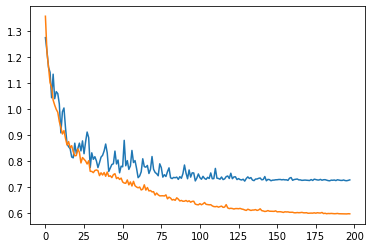

In [0]:
plt.plot(history.history['val_loss'][2:])
plt.plot(history.history['loss'][2:])
plt.show()

Mean error: 0.9397703456175842
Std of error: 0.7546592806414743


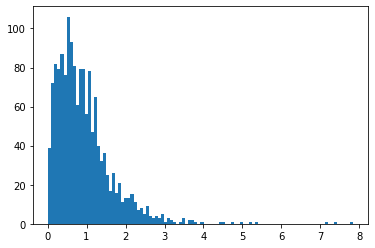

In [0]:
y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

###KNN

Mean error: 0.9873302727499864
Std of SE error: 1.0905937001404087


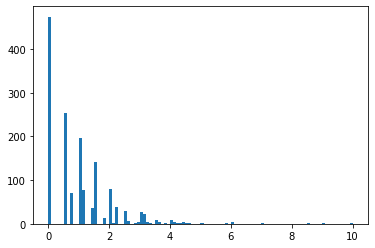

In [0]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

knn = KNNR(n_neighbors = 2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

error_knnr = []
for e in range(y_pred.shape[0]):
    error_knnr.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_knnr))
print('Std of SE error:',np.std(error_knnr))

plt.hist(np.asarray(error_knnr), bins=100)
plt.show()

##Noise : 6


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.concatenate([n_data_dict[node] for node in nodes])
y = [node_to_coordinates[node] for node in nodes]

labels = []
for label in y:
    for i in range(100):
        labels.append(label) 
labels = np.asarray(labels)

X_train, X_test, y_train, y_test = train_test_split(X, labels, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

(3570, 4) (3570, 2)
(1530, 4) (1530, 2)


###DNN

In [0]:
from keras.layers import *
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(4,))
x = Dense(128, activation='relu')(inp)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

Using TensorFlow backend.


In [0]:
history = model.fit(X_train, y_train, epochs = 200, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr])

Train on 3570 samples, validate on 1530 samples
Epoch 1/200
3570/3570 [==============================] - 2s 677us/step - loss: 20.4270 - val_loss: 4.2300
Epoch 2/200
3570/3570 [==============================] - 1s 199us/step - loss: 2.9906 - val_loss: 2.5313
Epoch 3/200
3570/3570 [==============================] - 1s 205us/step - loss: 2.1883 - val_loss: 2.0369
Epoch 4/200
3570/3570 [==============================] - 1s 196us/step - loss: 1.9405 - val_loss: 1.8710
Epoch 5/200
3570/3570 [==============================] - 1s 202us/step - loss: 1.7925 - val_loss: 1.7638
Epoch 6/200
3570/3570 [==============================] - 1s 198us/step - loss: 1.7255 - val_loss: 1.7649
Epoch 7/200
3570/3570 [==============================] - 1s 205us/step - loss: 1.6948 - val_loss: 1.6824
Epoch 8/200
3570/3570 [==============================] - 1s 198us/step - loss: 1.6855 - val_loss: 1.6517
Epoch 9/200
3570/3570 [==============================] - 1s 202us/step - loss: 1.6171 - val_loss: 1.8269
Epoch 

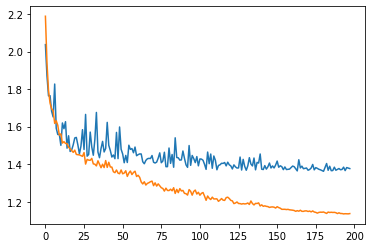

In [0]:
plt.plot(history.history['val_loss'][2:])
plt.plot(history.history['loss'][2:])
plt.show()

Mean error: 1.3038136416689714
Std of error: 1.0262111180453686


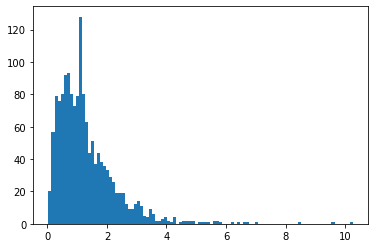

In [0]:
y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

###KNN

Mean error: 1.5069478162480843
Std of SE error: 1.3961397918263114


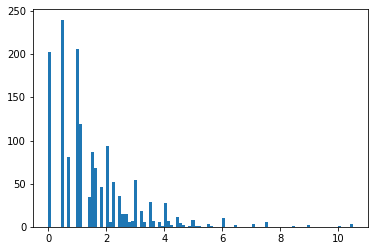

In [0]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

knn = KNNR(n_neighbors = 2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

error_knnr = []
for e in range(y_pred.shape[0]):
    error_knnr.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_knnr))
print('Std of SE error:',np.std(error_knnr))

plt.hist(np.asarray(error_knnr), bins=100)
plt.show()

##Noise 8

(3570, 4) (3570, 2)
(1530, 4) (1530, 2)


Using TensorFlow backend.


Train on 3570 samples, validate on 1530 samples
Epoch 1/200
3570/3570 [==============================] - 2s 662us/step - loss: 29.3724 - val_loss: 5.6664
Epoch 2/200
3570/3570 [==============================] - 1s 197us/step - loss: 4.0400 - val_loss: 3.1780
Epoch 3/200
3570/3570 [==============================] - 1s 189us/step - loss: 3.1261 - val_loss: 2.7186
Epoch 4/200
3570/3570 [==============================] - 1s 192us/step - loss: 2.8728 - val_loss: 2.6381
Epoch 5/200
3570/3570 [==============================] - 1s 191us/step - loss: 2.7493 - val_loss: 2.9387
Epoch 6/200
3570/3570 [==============================] - 1s 184us/step - loss: 2.7866 - val_loss: 2.5213
Epoch 7/200
3570/3570 [==============================] - 1s 186us/step - loss: 2.6919 - val_loss: 2.6814
Epoch 8/200
3570/3570 [==============================] - 1s 191us/step - loss: 2.6339 - val_loss: 2.4917
Epoch 9/200
3570/3570 [==============================] - 1s 187us/step - loss: 2.6633 - val_loss: 2.6367
Epoch 

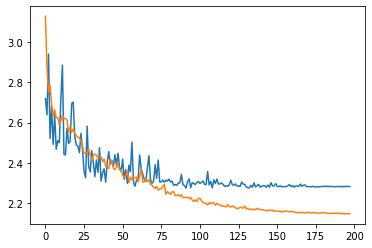

Mean error: 1.6407133514762855
Std of error: 1.3690036453377483


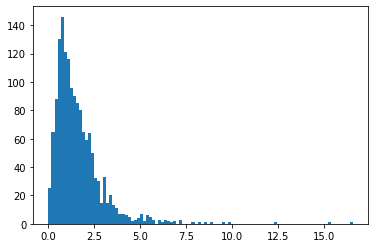

Mean error: 1.874149429584968
Std of SE error: 1.6771674671814858


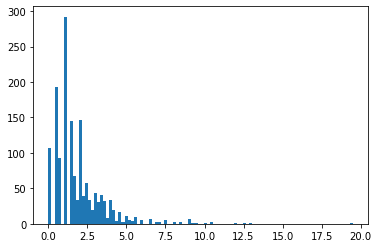

In [0]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.concatenate([n_data_dict[node] for node in nodes])
y = [node_to_coordinates[node] for node in nodes]

labels = []
for label in y:
    for i in range(100):
        labels.append(label) 
labels = np.asarray(labels)

X_train, X_test, y_train, y_test = train_test_split(X, labels, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

###DNN

from keras.layers import *
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(4,))
x = Dense(128, activation='relu')(inp)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

history = model.fit(X_train, y_train, epochs = 200, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr])

plt.plot(history.history['val_loss'][2:])
plt.plot(history.history['loss'][2:])
plt.show()

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

###KNN

from sklearn.neighbors import KNeighborsRegressor as KNNR

knn = KNNR(n_neighbors = 2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

error_knnr = []
for e in range(y_pred.shape[0]):
    error_knnr.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_knnr))
print('Std of SE error:',np.std(error_knnr))

plt.hist(np.asarray(error_knnr), bins=100)
plt.show()

##Noise 10

(3570, 4) (3570, 2)
(1530, 4) (1530, 2)


Using TensorFlow backend.


Train on 3570 samples, validate on 1530 samples
Epoch 1/200
3570/3570 [==============================] - 3s 742us/step - loss: 87.8104 - val_loss: 87.3876
Epoch 2/200
3570/3570 [==============================] - 1s 288us/step - loss: 86.8947 - val_loss: 87.3317
Epoch 3/200
3570/3570 [==============================] - 1s 285us/step - loss: 86.8775 - val_loss: 87.3542
Epoch 4/200
3570/3570 [==============================] - 1s 290us/step - loss: 86.8663 - val_loss: 87.3154
Epoch 5/200
3570/3570 [==============================] - 1s 285us/step - loss: 86.8776 - val_loss: 87.2978
Epoch 6/200
3570/3570 [==============================] - 1s 286us/step - loss: 86.8454 - val_loss: 87.3355
Epoch 7/200
3570/3570 [==============================] - 1s 286us/step - loss: 86.8542 - val_loss: 87.2950
Epoch 8/200
3570/3570 [==============================] - 1s 286us/step - loss: 86.8439 - val_loss: 87.2928
Epoch 9/200
3570/3570 [==============================] - 1s 285us/step - loss: 86.8530 - val_los

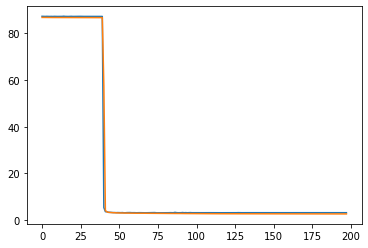

Mean error: 1.9403101800328475
Std of error: 1.6012975515558763


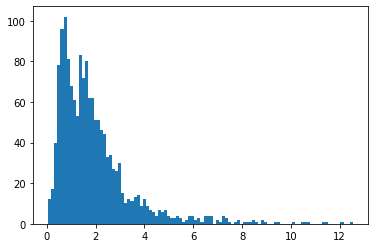

Mean error: 2.2343428633405082
Std of SE error: 1.9246083232173525


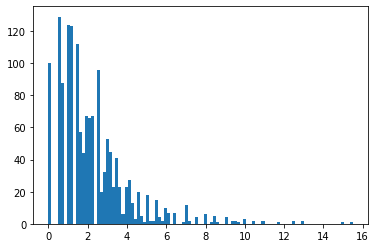

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.concatenate([n_data_dict[node] for node in nodes])
y = [node_to_coordinates[node] for node in nodes]

labels = []
for label in y:
    for i in range(100):
        labels.append(label) 
labels = np.asarray(labels)

X_train, X_test, y_train, y_test = train_test_split(X, labels, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

###DNN

from keras.layers import *
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(4,))
x = Dense(128, activation='relu')(inp)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

history = model.fit(X_train, y_train, epochs = 200, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr])

plt.plot(history.history['val_loss'][2:])
plt.plot(history.history['loss'][2:])
plt.show()

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

###KNN

from sklearn.neighbors import KNeighborsRegressor as KNNR

knn = KNNR(n_neighbors = 2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

error_knnr = []
for e in range(y_pred.shape[0]):
    error_knnr.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_knnr))
print('Std of SE error:',np.std(error_knnr))

plt.hist(np.asarray(error_knnr), bins=100)
plt.show()

##Noise 12

(3570, 4) (3570, 2)
(1530, 4) (1530, 2)
Train on 3570 samples, validate on 1530 samples
Epoch 1/200
3570/3570 [==============================] - 1s 325us/step - loss: 30.4179 - val_loss: 7.3086
Epoch 2/200
3570/3570 [==============================] - 1s 289us/step - loss: 5.6381 - val_loss: 5.4586
Epoch 3/200
3570/3570 [==============================] - 1s 300us/step - loss: 4.7799 - val_loss: 5.0525
Epoch 4/200
3570/3570 [==============================] - 1s 292us/step - loss: 4.5795 - val_loss: 5.1625
Epoch 5/200
3570/3570 [==============================] - 1s 290us/step - loss: 4.4553 - val_loss: 4.9608
Epoch 6/200
3570/3570 [==============================] - 1s 295us/step - loss: 4.3548 - val_loss: 5.0322
Epoch 7/200
3570/3570 [==============================] - 1s 290us/step - loss: 4.3583 - val_loss: 4.9601
Epoch 8/200
3570/3570 [==============================] - 1s 290us/step - loss: 4.3122 - val_loss: 4.8522
Epoch 9/200
3570/3570 [==============================] - 1s 288us/step 

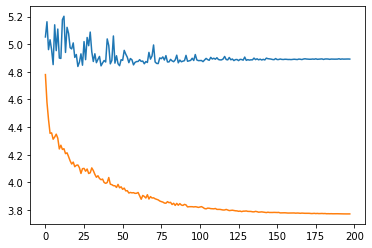

Mean error: 2.2793951158478585
Std of error: 2.142129896951026


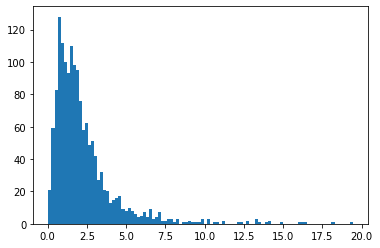

Mean error: 2.625616216305287
Std of SE error: 2.591576779420003


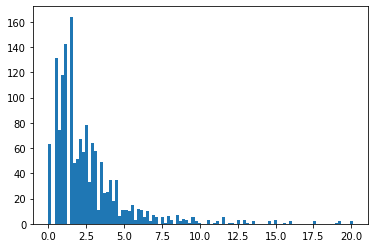

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.concatenate([n_data_dict[node] for node in nodes])
y = [node_to_coordinates[node] for node in nodes]

labels = []
for label in y:
    for i in range(100):
        labels.append(label) 
labels = np.asarray(labels)

X_train, X_test, y_train, y_test = train_test_split(X, labels, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

###DNN

from keras.layers import *
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(4,))
x = Dense(128, activation='relu')(inp)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

history = model.fit(X_train, y_train, epochs = 200, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr])

plt.plot(history.history['val_loss'][2:])
plt.plot(history.history['loss'][2:])
plt.show()

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

###KNN

from sklearn.neighbors import KNeighborsRegressor as KNNR

knn = KNNR(n_neighbors = 2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

error_knnr = []
for e in range(y_pred.shape[0]):
    error_knnr.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_knnr))
print('Std of SE error:',np.std(error_knnr))

plt.hist(np.asarray(error_knnr), bins=100)
plt.show()

#Trajectory Generation

In [0]:
def generate_trajectory(n_data_dict, data_dict, timesteps, num_of_samples=50000, show_images=False):

    rssi_seq = []
    coordinate_seq = []

    n_rssi_seq = []
    n_coordinate_seq = []

    for e in range(num_of_samples):                 
        traj_seq = []
        n_traj_seq = []
        label_seq = []

        seed_node_id = np.random.randint(0,len(nodes),1)[0] #Generate a random integer from [0,51] as starting node_id
        seed_node = nodes[seed_node_id]

        seed_rssi_vector, n_seed_rssi_vector, seed_label = get_node_attributes(seed_node, n_data_dict, data_dict)
        traj_seq.append(seed_rssi_vector)
        n_traj_seq.append(n_seed_rssi_vector)
        label_seq.append(seed_label)

        for t in range(timesteps-1):                #Since one node has already been appended 
            neighbours = nodes_connected_to[seed_node]
            len_of_neighbours = len(neighbours)
            next_seed_id = np.random.randint(0,len_of_neighbours,1)[0]

            seed_node = neighbours[next_seed_id]
            seed_rssi_vector, n_seed_rssi_vector, seed_label = get_node_attributes(seed_node, n_data_dict, data_dict)
            traj_seq.append(seed_rssi_vector)
            n_traj_seq.append(n_seed_rssi_vector)
            label_seq.append(seed_label)

        traj_seq = np.asarray(traj_seq)
        n_traj_seq = np.asarray(n_traj_seq)
        label_seq = np.asarray(label_seq)
        
        rssi_seq.append(traj_seq)
        coordinate_seq.append(label_seq)

        n_rssi_seq.append(n_traj_seq)    
        n_coordinate_seq.append(label_seq)

        if e%(num_of_samples/5)==0 and show_images==True:
            print('Sample:',e)
            draw_trajectory(label_seq) 

    rssi_seq = np.asarray(rssi_seq)
    coordinate_seq = np.asarray(coordinate_seq)

    n_rssi_seq = np.asarray(n_rssi_seq)
    n_coordinate_seq = np.asarray(n_coordinate_seq)
    
    return n_rssi_seq, n_coordinate_seq

In [0]:
def get_node_attributes(node, n_data_dict, data_dict):
    RANDOM_ID = np.random.randint(0,100,1)[0]
    
    rssi_vector = data_dict[node][RANDOM_ID,:]
    n_rssi_vector = n_data_dict[node][RANDOM_ID,:]
    label = np.asarray(node_to_coordinates[node])
    
    return rssi_vector, n_rssi_vector, label

In [0]:
def draw_trajectory(label_map, scale=2):
    traj_map = np.zeros((7*scale,25*scale))

    for t,n in enumerate(label_map):
        traj_map[n[0]*scale,(n[1]+1)*scale] = t+1

    plt.figure(figsize=(7*scale*0.65,3*scale*0.65))
    plt.imshow(traj_map,cmap='gray')
    plt.show()

#Objective 1: MISO : RSSI seq to final position prediction

##Generalized function

In [0]:
from sklearn.model_selection import train_test_split
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

def MISO(n_rssi_seq, n_coordinate_seq):
    X = n_rssi_seq
    Y = n_coordinate_seq[:,-1,:]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size=0.3)

    #Standarize
    mean = np.mean(X_train)
    std = np.mean(X_test)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std


    inp = Input(shape=(X_train.shape[1],X_train.shape[2]))
    x = GRU(128, return_sequences=True)(inp)
    x = Dropout(.25)(x)
    x = GRU(64, return_sequences=True)(x)
    x = Dropout(.25)(x)
    x = GRU(32, return_sequences=True)(x)
    x = Dropout(.25)(x)
    x = GRU(8, return_sequences = False)(x)
    x = Dropout(0.25)(x)
    x = Dense(2, activation = 'relu')(x)

    model = Model(inp, x)
    model.compile(loss='mse', optimizer='adam')
    lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=0)

    history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0, validation_data=(X_test, y_test), callbacks=[lr])

    y_pred = model.predict(X_test)

    error_nn = []
    for e in range(y_pred.shape[0]):
        error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

    return np.mean(error_nn), np.std(error_nn)

##Noise : 0

- Noise var: 0 
- Buffer size: 3

(35000, 3, 4) (35000, 2)
(15000, 3, 4) (15000, 2)
Epoch 1/100
1094/1094 [==============================] - 8s 8ms/step - loss: 30.5352 - val_loss: 12.1965 - lr: 0.0010
Epoch 2/100
1094/1094 [==============================] - 7s 7ms/step - loss: 9.2888 - val_loss: 3.3963 - lr: 0.0010
Epoch 3/100
1094/1094 [==============================] - 8s 7ms/step - loss: 5.3717 - val_loss: 1.4404 - lr: 0.0010
Epoch 4/100
1094/1094 [==============================] - 7s 7ms/step - loss: 4.1497 - val_loss: 1.0429 - lr: 0.0010
Epoch 5/100
1094/1094 [==============================] - 7s 7ms/step - loss: 3.8962 - val_loss: 0.8521 - lr: 0.0010
Epoch 6/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.5004 - val_loss: 0.8057 - lr: 0.0010
Epoch 7/100
1094/1094 [==============================] - 7s 7ms/step - loss: 3.2925 - val_loss: 0.7429 - lr: 0.0010
Epoch 8/100
1094/1094 [==============================] - 8s 7ms/step - loss: 2.9980 - val_loss: 0.6010 - lr: 0.0010
Epoch 9/100
1094/109

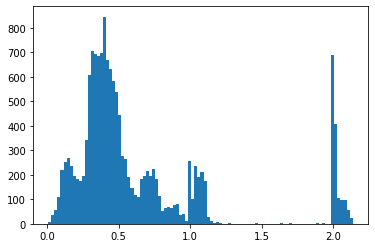

In [0]:
from sklearn.model_selection import train_test_split

X = n_rssi_seq
Y = n_coordinate_seq[:,-1,:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Standarize
mean = np.mean(X_train)
std = np.mean(X_test)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(X_train.shape[1],X_train.shape[2]))
x = GRU(128, return_sequences=True)(inp)
x = Dropout(.25)(x)
x = GRU(64, return_sequences=True)(x)
x = Dropout(.25)(x)
x = GRU(32, return_sequences=True)(x)
x = Dropout(.25)(x)
x = GRU(8, return_sequences = False)(x)
x = Dropout(0.25)(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[lr])

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of SE error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

##Noise : 2

- Noise var: 2 
- Buffer size: 3

(35000, 3, 4) (35000, 2)
(15000, 3, 4) (15000, 2)
Epoch 1/100
1094/1094 [==============================] - 9s 8ms/step - loss: 31.3860 - val_loss: 12.8647 - lr: 0.0010
Epoch 2/100
1094/1094 [==============================] - 8s 7ms/step - loss: 9.6316 - val_loss: 3.6921 - lr: 0.0010
Epoch 3/100
1094/1094 [==============================] - 8s 7ms/step - loss: 5.3917 - val_loss: 1.5434 - lr: 0.0010
Epoch 4/100
1094/1094 [==============================] - 8s 7ms/step - loss: 4.2506 - val_loss: 1.2309 - lr: 0.0010
Epoch 5/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.9294 - val_loss: 0.8688 - lr: 0.0010
Epoch 6/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.6077 - val_loss: 0.8125 - lr: 0.0010
Epoch 7/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.3448 - val_loss: 0.7612 - lr: 0.0010
Epoch 8/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.0880 - val_loss: 0.7628 - lr: 0.0010
Epoch 9/100
1094/109

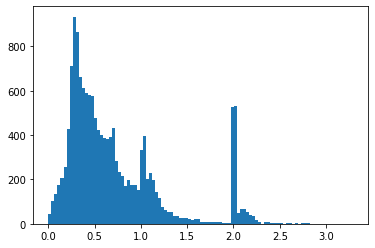

In [0]:
'''
- Noise var: 4 
- Buffer size: 3

from sklearn.model_selection import train_test_split

X = n_rssi_seq
Y = n_coordinate_seq[:,-1,:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Standarize
mean = np.mean(X_train)
std = np.mean(X_test)
X_train = (X
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(X_train.shape[1],X_train.shape[2]))
x = GRU(4, return_sequences=True)(inp)
x = Dropout(0.5)(x)
x = GRU(3, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = GRU(2, return_sequences=False)(x)
x = Dropout(0.5)(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[lr])

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('
'''

from sklearn.model_selection import train_test_split

X = n_rssi_seq
Y = n_coordinate_seq[:,-1,:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Standarize
mean = np.mean(X_train)
std = np.mean(X_test)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(X_train.shape[1],X_train.shape[2]))
x = GRU(128, return_sequences=True)(inp)
x = Dropout(.25)(x)
x = GRU(64, return_sequences=True)(x)
x = Dropout(.25)(x)
x = GRU(32, return_sequences=True)(x)
x = Dropout(.25)(x)
x = GRU(8, return_sequences = False)(x)
x = Dropout(0.25)(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[lr])

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of SE error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

##Noise : 4

- Noise var: 4
- Buffer size: 3

(35000, 3, 4) (35000, 2)
(15000, 3, 4) (15000, 2)
Epoch 1/100
1094/1094 [==============================] - 8s 8ms/step - loss: 32.7380 - val_loss: 13.4046 - lr: 0.0010
Epoch 2/100
1094/1094 [==============================] - 8s 7ms/step - loss: 9.9510 - val_loss: 3.9277 - lr: 0.0010
Epoch 3/100
1094/1094 [==============================] - 8s 7ms/step - loss: 5.6222 - val_loss: 1.7485 - lr: 0.0010
Epoch 4/100
1094/1094 [==============================] - 7s 7ms/step - loss: 4.3862 - val_loss: 1.1785 - lr: 0.0010
Epoch 5/100
1094/1094 [==============================] - 7s 7ms/step - loss: 3.9939 - val_loss: 1.0263 - lr: 0.0010
Epoch 6/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.7274 - val_loss: 0.9295 - lr: 0.0010
Epoch 7/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.4633 - val_loss: 0.9970 - lr: 0.0010
Epoch 8/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.2259 - val_loss: 0.9195 - lr: 0.0010
Epoch 9/100
1094/109

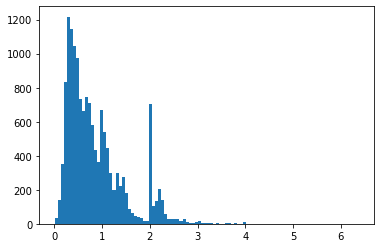

In [0]:
'''
- Noise var: 4 
- Buffer size: 3

from sklearn.model_selection import train_test_split

X = n_rssi_seq
Y = n_coordinate_seq[:,-1,:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Standarize
mean = np.mean(X_train)
std = np.mean(X_test)
X_train = (X
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(X_train.shape[1],X_train.shape[2]))
x = GRU(4, return_sequences=True)(inp)
x = Dropout(0.5)(x)
x = GRU(3, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = GRU(2, return_sequences=False)(x)
x = Dropout(0.5)(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[lr])

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('
'''

from sklearn.model_selection import train_test_split

X = n_rssi_seq
Y = n_coordinate_seq[:,-1,:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Standarize
mean = np.mean(X_train)
std = np.mean(X_test)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(X_train.shape[1],X_train.shape[2]))
x = GRU(128, return_sequences=True)(inp)
x = Dropout(.25)(x)
x = GRU(64, return_sequences=True)(x)
x = Dropout(.25)(x)
x = GRU(32, return_sequences=True)(x)
x = Dropout(.25)(x)
x = GRU(8, return_sequences = False)(x)
x = Dropout(0.25)(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[lr])

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of SE error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

##Noise 6

(35000, 3, 4) (35000, 2)
(15000, 3, 4) (15000, 2)
Epoch 1/100
1094/1094 [==============================] - 8s 8ms/step - loss: 31.4651 - val_loss: 13.3363 - lr: 0.0010
Epoch 2/100
1094/1094 [==============================] - 8s 7ms/step - loss: 9.9076 - val_loss: 4.0919 - lr: 0.0010
Epoch 3/100
1094/1094 [==============================] - 8s 7ms/step - loss: 5.8146 - val_loss: 2.0160 - lr: 0.0010
Epoch 4/100
1094/1094 [==============================] - 8s 7ms/step - loss: 4.6384 - val_loss: 1.3839 - lr: 0.0010
Epoch 5/100
1094/1094 [==============================] - 8s 7ms/step - loss: 4.0325 - val_loss: 1.2078 - lr: 0.0010
Epoch 6/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.7681 - val_loss: 1.1246 - lr: 0.0010
Epoch 7/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.6003 - val_loss: 1.0350 - lr: 0.0010
Epoch 8/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.3293 - val_loss: 1.0464 - lr: 0.0010
Epoch 9/100
1094/109

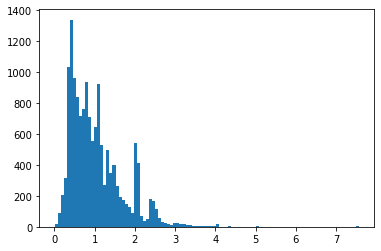

In [0]:
'''
- Noise var: 4 
- Buffer size: 3

from sklearn.model_selection import train_test_split

X = n_rssi_seq
Y = n_coordinate_seq[:,-1,:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Standarize
mean = np.mean(X_train)
std = np.mean(X_test)
X_train = (X
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(X_train.shape[1],X_train.shape[2]))
x = GRU(4, return_sequences=True)(inp)
x = Dropout(0.5)(x)
x = GRU(3, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = GRU(2, return_sequences=False)(x)
x = Dropout(0.5)(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[lr])

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('
'''

from sklearn.model_selection import train_test_split

X = n_rssi_seq
Y = n_coordinate_seq[:,-1,:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Standarize
mean = np.mean(X_train)
std = np.mean(X_test)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(X_train.shape[1],X_train.shape[2]))
x = GRU(128, return_sequences=True)(inp)
x = Dropout(.25)(x)
x = GRU(64, return_sequences=True)(x)
x = Dropout(.25)(x)
x = GRU(32, return_sequences=True)(x)
x = Dropout(.25)(x)
x = GRU(8, return_sequences = False)(x)
x = Dropout(0.25)(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[lr])

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of SE error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

##Noise 8

(35000, 3, 4) (35000, 2)
(15000, 3, 4) (15000, 2)
Epoch 1/100
1094/1094 [==============================] - 9s 8ms/step - loss: 34.2163 - val_loss: 14.5840 - lr: 0.0010
Epoch 2/100
1094/1094 [==============================] - 8s 7ms/step - loss: 10.5947 - val_loss: 4.4286 - lr: 0.0010
Epoch 3/100
1094/1094 [==============================] - 8s 7ms/step - loss: 6.0054 - val_loss: 2.2371 - lr: 0.0010
Epoch 4/100
1094/1094 [==============================] - 8s 7ms/step - loss: 4.8109 - val_loss: 1.5338 - lr: 0.0010
Epoch 5/100
1094/1094 [==============================] - 8s 7ms/step - loss: 4.3652 - val_loss: 1.3688 - lr: 0.0010
Epoch 6/100
1094/1094 [==============================] - 8s 7ms/step - loss: 4.0863 - val_loss: 1.3390 - lr: 0.0010
Epoch 7/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.8619 - val_loss: 1.3179 - lr: 0.0010
Epoch 8/100
1094/1094 [==============================] - 8s 7ms/step - loss: 3.6445 - val_loss: 1.2869 - lr: 0.0010
Epoch 9/100
1094/10

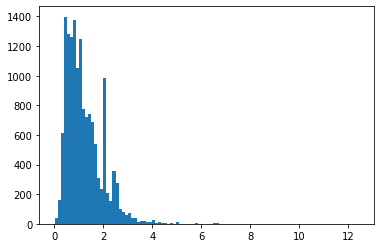

In [0]:
##Noise 6

##Noise : 4
'''
- Noise var: 4
- Buffer size: 3

from sklearn.model_selection import train_test_split

X = n_rssi_seq
Y = n_coordinate_seq[:,-1,:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Standarize
mean = np.mean(X_train)
std = np.mean(X_test)
X_train = (X
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(X_train.shape[1],X_train.shape[2]))
x = GRU(4, return_sequences=True)(inp)
x = Dropout(0.5)(x)
x = GRU(3, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = GRU(2, return_sequences=False)(x)
x = Dropout(0.5)(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[lr])

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('
'''

from sklearn.model_selection import train_test_split

X = n_rssi_seq
Y = n_coordinate_seq[:,-1,:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Standarize
mean = np.mean(X_train)
std = np.mean(X_test)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(X_train.shape[1],X_train.shape[2]))
x = GRU(128, return_sequences=True)(inp)
x = Dropout(.25)(x)
x = GRU(64, return_sequences=True)(x)
x = Dropout(.25)(x)
x = GRU(32, return_sequences=True)(x)
x = Dropout(.25)(x)
x = GRU(8, return_sequences = False)(x)
x = Dropout(0.25)(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[lr])

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of SE error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

##Noise 10

(35000, 3, 4) (35000, 2)
(15000, 3, 4) (15000, 2)
Epoch 1/100
1094/1094 [==============================] - 12s 11ms/step - loss: 31.5577 - val_loss: 13.0252 - lr: 0.0010
Epoch 2/100
1094/1094 [==============================] - 11s 10ms/step - loss: 9.9580 - val_loss: 4.1886 - lr: 0.0010
Epoch 3/100
1094/1094 [==============================] - 11s 10ms/step - loss: 6.0626 - val_loss: 2.5368 - lr: 0.0010
Epoch 4/100
1094/1094 [==============================] - 10s 10ms/step - loss: 4.9377 - val_loss: 1.7333 - lr: 0.0010
Epoch 5/100
1094/1094 [==============================] - 10s 10ms/step - loss: 4.5365 - val_loss: 1.5927 - lr: 0.0010
Epoch 6/100
1094/1094 [==============================] - 11s 10ms/step - loss: 4.2261 - val_loss: 1.6007 - lr: 0.0010
Epoch 7/100
1094/1094 [==============================] - 11s 10ms/step - loss: 3.9397 - val_loss: 1.5193 - lr: 0.0010
Epoch 8/100
1094/1094 [==============================] - 11s 10ms/step - loss: 3.7293 - val_loss: 1.4759 - lr: 0.0010
Epoc

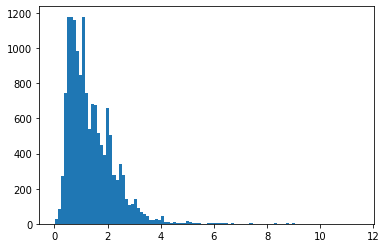

In [0]:
from sklearn.model_selection import train_test_split

X = n_rssi_seq
Y = n_coordinate_seq[:,-1,:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Standarize
mean = np.mean(X_train)
std = np.mean(X_test)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(X_train.shape[1],X_train.shape[2]))
x = GRU(128, return_sequences=True)(inp)
x = Dropout(.25)(x)
x = GRU(64, return_sequences=True)(x)
x = Dropout(.25)(x)
x = GRU(32, return_sequences=True)(x)
x = Dropout(.25)(x)
x = GRU(8, return_sequences = False)(x)
x = Dropout(0.25)(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[lr])

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of SE error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

##Noise 12


(35000, 3, 4) (35000, 2)
(15000, 3, 4) (15000, 2)
Epoch 1/100
1094/1094 [==============================] - 12s 11ms/step - loss: 30.8973 - val_loss: 12.8916 - lr: 0.0010
Epoch 2/100
1094/1094 [==============================] - 11s 10ms/step - loss: 10.0019 - val_loss: 4.4718 - lr: 0.0010
Epoch 3/100
1094/1094 [==============================] - 11s 10ms/step - loss: 6.5187 - val_loss: 2.7473 - lr: 0.0010
Epoch 4/100
1094/1094 [==============================] - 11s 10ms/step - loss: 5.2736 - val_loss: 2.0471 - lr: 0.0010
Epoch 5/100
1094/1094 [==============================] - 11s 10ms/step - loss: 4.7834 - val_loss: 1.8838 - lr: 0.0010
Epoch 6/100
1094/1094 [==============================] - 11s 10ms/step - loss: 4.5212 - val_loss: 1.8840 - lr: 0.0010
Epoch 7/100
1094/1094 [==============================] - 11s 10ms/step - loss: 4.3158 - val_loss: 1.8435 - lr: 0.0010
Epoch 8/100
1094/1094 [==============================] - 11s 10ms/step - loss: 4.0962 - val_loss: 1.7478 - lr: 0.0010
Epo

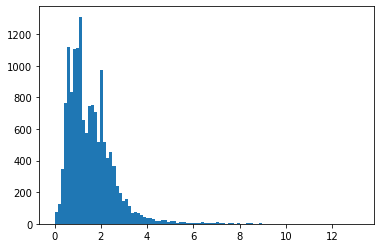

In [0]:
from sklearn.model_selection import train_test_split

X = n_rssi_seq
Y = n_coordinate_seq[:,-1,:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Standarize
mean = np.mean(X_train)
std = np.mean(X_test)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(X_train.shape[1],X_train.shape[2]))
x = GRU(128, return_sequences=True)(inp)
x = Dropout(.25)(x)
x = GRU(64, return_sequences=True)(x)
x = Dropout(.25)(x)
x = GRU(32, return_sequences=True)(x)
x = Dropout(.25)(x)
x = GRU(8, return_sequences = False)(x)
x = Dropout(0.25)(x)
x = Dense(2, activation = 'relu')(x)

model = Model(inp, x)
model.compile(loss='mse', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[lr])

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of SE error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()

#Objective: Noise Analysis



--------------------------------------------------------------------------------------------------
Noise Std:  0
Timesteps:  6
Sample: 0


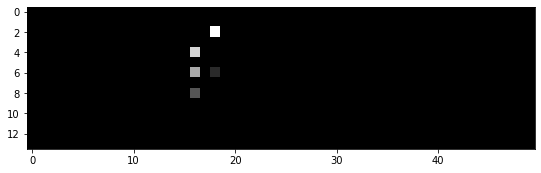

Sample: 10000


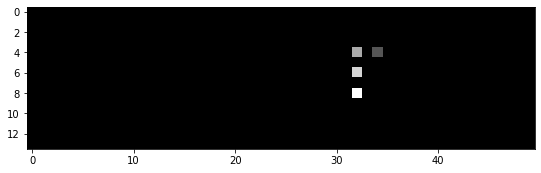

Sample: 20000


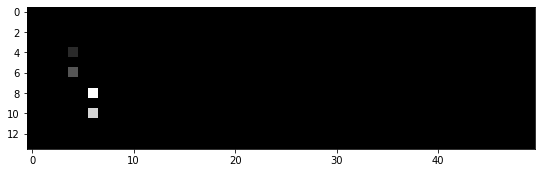

Sample: 30000


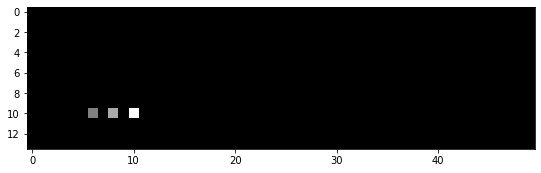

Sample: 40000


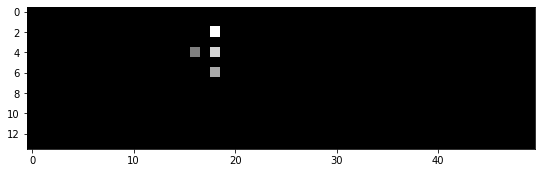

MISO : LSTM mean error: 0.6343135642366965 LSTM std error: 0.5351784095680698

--------------------------------------------------------------------------------------------------
Noise Std:  2
Timesteps:  6
Sample: 0


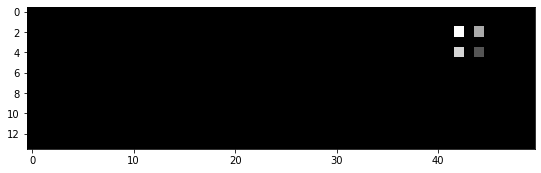

Sample: 10000


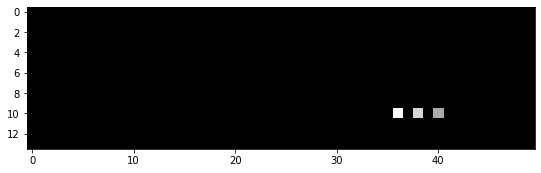

Sample: 20000


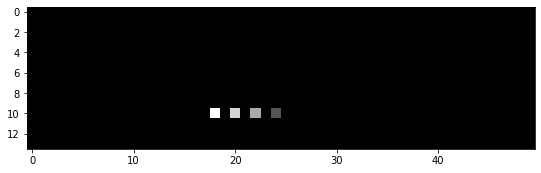

Sample: 30000


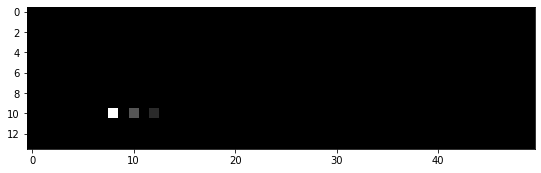

Sample: 40000


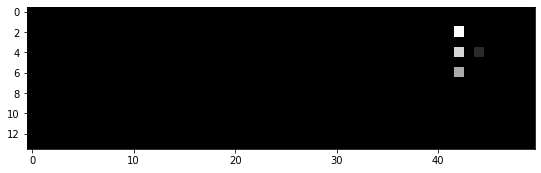

In [0]:
for ts in range(6,15,3):
    for noise_std in range(0,14,2):
        print('')
        print('--------------------------------------------------------------------------------------------------')
        print('Noise Std: ', noise_std)
        print('Timesteps: ', ts)
        
        data_dict, n_data_dict = create_data(noise_std)
        n_rssi_data, n_coordinate_data = generate_trajectory(data_dict=data_dict, n_data_dict=n_data_dict, timesteps=ts, show_images=True)

        #NN_mean_error, NN_std_error, KNN_mean_error, KNN_std_error = SISO(data_dict)
        LSTM_mean_error, LSTM_std_error = MISO(n_rssi_seq=n_rssi_data, n_coordinate_seq=n_coordinate_data)

        #print('SISO :', 'NN mean error: ', NN_mean_error, 'NN_std_error: ', NN_std_error ) #, 'KNN mean error:',KNN_mean_error,'KNN std error:',KNN_std_error)
        print('MISO :', 'LSTM mean error:', LSTM_mean_error, 'LSTM std error:', LSTM_std_error)


#Objective 2: MIMO: RSSI seq --> Location seq

##seq RSSI --> seq Node coordinates

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(rssi_seq, coordinate_seq, shuffle = True, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Standarize
mean = np.mean(X_train)
std = np.mean(X_test)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

(70000, 15, 4) (70000, 15, 2)
(30000, 15, 4) (30000, 15, 2)


In [0]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Concatenate
from tensorflow.python.keras import regularizers

encoder_input_shape = (15,4)
decoder_input_shape = (15,2)
output_dim = 2
latent_dim = 8
lstm_dim = 8

#encoder
encoder_inputs = Input(shape=encoder_input_shape)
encoder = LSTM(lstm_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
states = Concatenate(axis=-1)([state_h, state_c])
neck = Dense(latent_dim, activation="linear")
neck_outputs = neck(states)

#decoder
decode_h = Dense(lstm_dim, activation="relu")
decode_c = Dense(lstm_dim, activation="relu")
state_h_decoded =  decode_h(neck_outputs)
state_c_decoded =  decode_c(neck_outputs)
encoder_states = [state_h_decoded, state_c_decoded]

decoder_inputs = Input(shape=decoder_input_shape)
decoder_lstm = LSTM(lstm_dim,
                    return_sequences=True)
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_outputs = Dense(output_dim, activation='relu')(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
#print(model.summary())

In [0]:
from tensorflow.python.keras.callbacks import History, ReduceLROnPlateau
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5,patience=5, min_lr=0.0000001, verbose=1, epsilon=1e-5)

model.compile(optimizer='adam', loss='mse')

In [0]:
model.fit([X_train, y_train], y_train,
                    epochs=20,
                    batch_size=48,
                    shuffle=True,
                    callbacks=[rlr],
                    validation_data=[[X_test, y_test], y_test ])

In [0]:
model.predict([X_test[0:1], y_test[0:1]])

In [0]:
y_test[0:1]

##seq RSSI --> seq oneHotEncoded node

In [0]:
from sklearn.model_selection import train_test_split

label_nodes = [[coordinates_to_node(c) for c in seq] for seq in coordinate_seq]
one_hot_encoded_nodes = [np.asarray([np.eye(len(nodes)+1)[nodes.index(n)] for n in seq]) for seq in label_nodes]

sos = np.eye(len(nodes)+1)[-1].reshape(1,len(nodes)+1)

SOS_encoded_nodes = np.asarray([np.vstack((sos, seq)) for seq in one_hot_encoded_nodes])

X_train, X_test, y_train, y_test = train_test_split(rssi_seq, SOS_encoded_nodes, shuffle = True, test_size=0.20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Standarize
mean = np.mean(X_train)
std = np.mean(X_test)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

(40000, 7, 4) (40000, 8, 52)
(10000, 7, 4) (10000, 8, 52)


In [0]:
y_train_real = y_train[:,1:,:]
y_test_real = y_test[:,1:,:]

y_train_padded = y_train[:,:-1,:]
y_test_padded = y_test[:,:-1,:]

In [0]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Concatenate
from tensorflow.python.keras import regularizers

encoder_input_shape = (X_train.shape[1],4)
decoder_input_shape = (None,y_train.shape[-1]) #timesteps: SOS+15 = 17 || vocab: SOS+51+EOS = 53
output_dim = decoder_input_shape[1]
latent_dim = 8
lstm_dim = 8

#encoder
encoder_inputs = Input(shape=encoder_input_shape)
encoder = LSTM(lstm_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

#decoder
decoder_inputs = Input(shape=decoder_input_shape)
decoder_lstm = LSTM(lstm_dim, return_sequences=True, return_state=True)
decoder_outputs,_,_ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(output_dim, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
#print(model.summary())

In [0]:
inf_encoder = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(lstm_dim,))
decoder_state_input_c = Input(shape=(lstm_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
inf_decoder = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)


In [0]:
from tensorflow.python.keras.callbacks import History, ReduceLROnPlateau, ModelCheckpoint

filepath = '/content/drive/My Drive/Final_year_project/NLOS_data/seq2seq_weights.h5'

rlr = ReduceLROnPlateau(monitor='loss', factor=0.5,patience=5, min_lr=0.0000001, verbose=1, epsilon=1e-5)
cpt = ModelCheckpoint(filepath=filepath, save_best_only=True, save_weights_only=True, monitor='loss', mode='min')

model.compile(optimizer='adam', loss='categorical_crossentropy')

In [0]:
model.fit([X_train, y_train_padded], y_train_real,
                    epochs=500,
                    batch_size=48,
                    shuffle=True,
                    callbacks=[rlr, cpt],
                    validation_data=[[X_test, y_test_padded], y_test_real ])

Epoch 1/500
834/834 [==============================] - 8s 9ms/step - loss: 2.8792 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 2/500
834/834 [==============================] - 6s 8ms/step - loss: 1.9801 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 3/500
834/834 [==============================] - 7s 8ms/step - loss: 1.7605 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 4/500
834/834 [==============================] - 7s 8ms/step - loss: 1.6502 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 5/500
834/834 [==============================] - 6s 8ms/step - loss: 1.5864 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 6/500
834/834 [==============================] - 6s 7ms/step - loss: 1.5462 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 7/500
834/834 [==============================] - 7s 8ms/step - loss: 1.5166 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 8/500
834/834 [==============================] - 7s 8ms/step - loss: 1.4930 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 9/500
834/834 [==============================] - 7

0


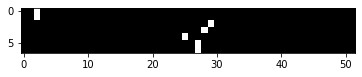

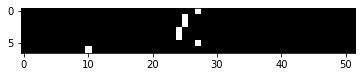

1


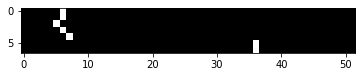

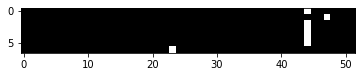

2


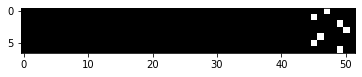

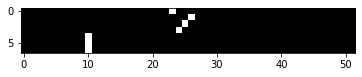

3


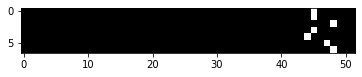

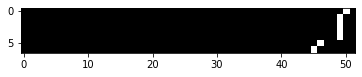

4


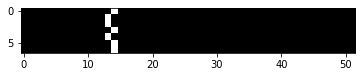

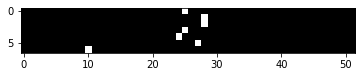

In [0]:
for i, seq in enumerate(X_train[10:15]):
    state = inf_encoder.predict(seq.reshape(1,seq.shape[0], seq.shape[1]))

    sample_vec = sos.reshape(1, sos.shape[0], sos.shape[1])
    output = []

    for _ in range(X_train.shape[1]):
        y_hat, h, c = inf_decoder.predict([sample_vec] + state)
        idx = np.argmax(y_hat[0,0,:])
        y = np.zeros((y_hat.shape[-1],))
        y[idx] = 1
        output.append(y)
        state = [h,c]
        sample_vec = y_hat
    output = np.asarray(output)

    print(i)
    plt.imshow(y_train_real[i], cmap='gray')
    plt.show()
    plt.imshow(output, cmap='gray')
    plt.show()


##Seq of RSSI --> OneHot Encoded final node vector

In [0]:
coordinates = coordinate_seq[:,-1,:]
label_nodes = [coordinates_to_node(c) for c in coordinates]
one_hot_encoded_nodes = np.asarray([np.eye(len(nodes))[nodes.index(n)] for n in label_nodes])

X_train, X_test, y_train, y_test = train_test_split(rssi_seq, one_hot_encoded_nodes, shuffle = True, test_size=0.25)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#Standarize
mean = np.mean(X_train)
std = np.mean(X_test)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

(75000, 15, 4) (75000, 51)
(25000, 15, 4) (25000, 51)


In [0]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(X_train.shape[1],X_train.shape[2]))
x = LSTM(4)(inp)
x = Dropout(0.2)(x)
x = Dense(51, activation = 'softmax')(x)

model = Model(inp, x)
model.compile(loss='categorical_crossentropy', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

In [0]:
history = model.fit(X_train, y_train, batch_size=48, epochs=20, validation_data=(X_test, y_test), callbacks=[lr])

Mean error: 0.5380597512611865
Std of SE error: 0.7662973992339723


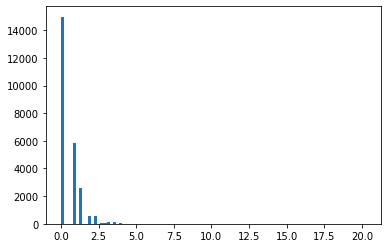

In [0]:
y_pred = model.predict(X_test)

error_gru = []

for e in range(y_pred.shape[0]):
    pred_coordinates = node_to_coordinates[nodes[np.argmax(y_pred[e])]]
    true_coordinates = node_to_coordinates[nodes[np.argmax(y_test[e])]]

    error_gru.append(np.sqrt((pred_coordinates[0] - true_coordinates[0])**2 + (pred_coordinates[1] - true_coordinates[1])**2))

print('Mean error:', np.mean(error_gru))
print('Std of SE error:',np.std(error_gru))

plt.hist(np.asarray(error_gru), bins=100)
plt.show()

#Time Series prediction : Node prediction

In [0]:
node_seq_data = np.asarray([[coordinates_to_node(c) for c in seq] for seq in coordinate_seq])
node_seq_data.shape

(50000, 7)

In [0]:
X = node_seq_data[:,:-1]
Y = node_seq_data[:, -1]

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size=0.1)

en_X_train = np.asarray([np.asarray([nodes.index(n) for n in seq]) for seq in X_train])
en_X_test = np.asarray([np.asarray([nodes.index(n) for n in seq]) for seq in X_test])

en_y_train = np.asarray([np.eye(len(nodes))[nodes.index(n)] for n in y_train])
en_y_test = np.asarray([np.eye(len(nodes))[nodes.index(n)] for n in y_test])

print(en_X_train.shape, en_y_train.shape)
print(en_X_test.shape, en_y_test.shape)

(45000, 6) (45000, 51)
(5000, 6) (5000, 51)


In [0]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(X_train.shape[1],))
x = Embedding(51, 16, input_length=X_train.shape[1])(inp)
x = LSTM(16, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = LSTM(16)(x)
x = Dropout(0.2)(x)
x = Dense(51, activation = 'softmax')(x)

series_model = Model(inp, x)
series_model.compile(loss='categorical_crossentropy', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

In [0]:
history = series_model.fit(en_X_train, en_y_train, batch_size=48, epochs=20, validation_data=(en_X_test, en_y_test), callbacks=[lr])

Epoch 1/20
938/938 [==============================] - 9s 9ms/step - loss: 2.9050 - val_loss: 2.2495 - lr: 0.0010
Epoch 2/20
938/938 [==============================] - 8s 8ms/step - loss: 2.1290 - val_loss: 1.9002 - lr: 0.0010
Epoch 3/20
938/938 [==============================] - 8s 8ms/step - loss: 1.8994 - val_loss: 1.7402 - lr: 0.0010
Epoch 4/20
938/938 [==============================] - 8s 8ms/step - loss: 1.7908 - val_loss: 1.6579 - lr: 0.0010
Epoch 5/20
938/938 [==============================] - 8s 8ms/step - loss: 1.7344 - val_loss: 1.6174 - lr: 0.0010
Epoch 6/20
938/938 [==============================] - 8s 8ms/step - loss: 1.7025 - val_loss: 1.5881 - lr: 0.0010
Epoch 7/20
938/938 [==============================] - 7s 8ms/step - loss: 1.6869 - val_loss: 1.5766 - lr: 0.0010
Epoch 8/20
938/938 [==============================] - 8s 8ms/step - loss: 1.6684 - val_loss: 1.5618 - lr: 0.0010
Epoch 9/20
938/938 [==============================] - 8s 8ms/step - loss: 1.6555 - val_loss: 1.5

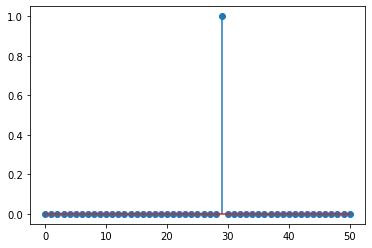

<StemContainer object of 3 artists>

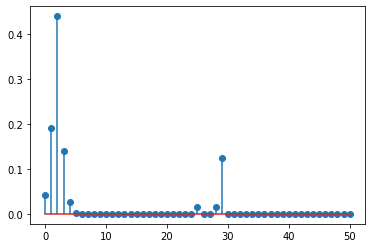

In [0]:
s = 60
plt.stem(en_y_train[s], use_line_collection=True)
plt.show()
plt.stem(series_model.predict(en_X_train[s:s+1])[0], use_line_collection=True)

In [0]:
'''
rssi_X = rssi_seq[:,-1,:]
rssi_Y = coordinate_seq[:,-1,:]
rssi_Y_nodes = [coordinates_to_node(c) for c in rssi_Y]
en_rssi_Y = np.asarray([np.eye(len(nodes))[nodes.index(n)] for n in rssi_Y_nodes])
'''
rssi_X = y_train

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(45000, 4) (45000, 51)
(5000, 4) (5000, 51)


In [0]:
from keras.layers import *
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

inp = Input(shape=(4,))
x = Dense(128, activation='relu')(inp)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(51, activation = 'softmax')(x)

model = Model(inp, x)
model.compile(loss='categorical_crossentropy', optimizer='adam')
lr = ReduceLROnPlateau(patience = 10, monitor='val_loss', factor = 0.75, min_lr = 1e-6, verbose=1)

In [0]:
model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 13s 291us/step - loss: 1.1949 - val_loss: 0.9578
Epoch 2/50
45000/45000 [==============================] - 13s 288us/step - loss: 0.7778 - val_loss: 0.7183
Epoch 3/50
45000/45000 [==============================] - 13s 289us/step - loss: 0.7340 - val_loss: 0.7126
Epoch 4/50
45000/45000 [==============================] - 13s 288us/step - loss: 0.7102 - val_loss: 0.6198
Epoch 5/50
45000/45000 [==============================] - 13s 291us/step - loss: 0.7014 - val_loss: 0.7092
Epoch 6/50
45000/45000 [==============================] - 13s 288us/step - loss: 0.6847 - val_loss: 0.6509
Epoch 7/50
45000/45000 [==============================] - 13s 289us/step - loss: 0.6781 - val_loss: 0.6552
Epoch 8/50
45000/45000 [==============================] - 13s 290us/step - loss: 0.6677 - val_loss: 0.6747
Epoch 9/50
45000/45000 [==============================] - 13s 287us/step - loss: 0.6621 - val_l

KeyboardInterrupt: ignored

Mean error: 0.006076994534169057
Std of SE error: 0.06285789521772076


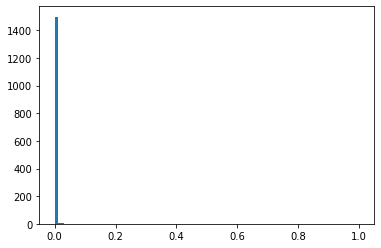

In [0]:
#With added gaussian noise and categorical output

y_pred = model.predict(X_test)

error_nn = []
for e in range(y_pred.shape[0]):
    error_nn.append(np.sqrt((y_pred[e][0] - y_test[e][0])**2 + (y_pred[e][1] - y_test[e][1])**2))

print('Mean error:', np.mean(error_nn))
print('Std of SE error:',np.std(error_nn))

plt.hist(np.asarray(error_nn), bins=100)
plt.show()